<a href="https://colab.research.google.com/github/Ricocoding/Web-scraping-Finance/blob/main/Web_scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The primary goal of this collaborative project is to develop a versatile web scraping tool capable of extracting historical data (2023 YTD) from the US stock market for multiple stocks. In our demo, we showcase the functionality using NVDA (NVIDIA Corporation) and TSLA (Tesla, Inc.) while comparing their performance with the SPY market index.

In [ ]:
# Install some libraries needed by pip
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [ ]:
# Import useful libraries
import requests
from bs4 import BeautifulSoup
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def get_data(ticker):
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}'
    params = {
        'period1': '1672531200',
        'period2': '1701907200',
        'interval': '1d',
        'events': 'history',
        'includeAdjustedClose': 'true'
    }

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    response = requests.get(url, params=params, headers=headers)

    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
        return df
    else:
        print(f"Failed to retrieve data for {ticker}. Status code: {response.status_code}")
        return None

# User input for multiple stock tickers
ticker_list = input("Enter stock tickers separated by commas (e.g., NVDA,SPY,GOOGL): ").split(',')

# Dictionary to store dataframes
dataframes = {}

# Loop through the list and fetch data for each ticker
for ticker in ticker_list:
    ticker = ticker.strip()  # Remove leading/trailing spaces
    stock_df = get_data(ticker)

    if stock_df is not None:
        dataframes[ticker] = stock_df
        print(f"\n{ticker} DataFrame:")
        print(stock_df.head(10))


Enter stock tickers separated by commas (e.g., NVDA,SPY,GOOGL): nvda, tsla, spy

nvda DataFrame:
         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  148.509995  149.960007  140.960007  143.149994  143.086502   
1  2023-01-04  145.669998  148.529999  142.410004  147.490005  147.424591   
2  2023-01-05  144.910004  145.639999  141.479996  142.649994  142.586731   
3  2023-01-06  144.740005  150.100006  140.339996  148.589996  148.524109   
4  2023-01-09  152.839996  160.559998  151.410004  156.279999  156.210693   
5  2023-01-10  155.070007  159.619995  154.720001  159.089996  159.019424   
6  2023-01-11  158.399994  160.279999  155.630005  160.009995  159.939026   
7  2023-01-12  161.000000  166.369995  154.919998  165.110001  165.036789   
8  2023-01-13  162.779999  169.220001  161.649994  168.990005  168.915039   
9  2023-01-17  168.990005  177.279999  168.990005  177.020004  176.941498   

     Volume  
0  40127700  
1  43132400  
2  38916800  

In [ ]:
dataframes['nvda']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.086502,40127700
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424591,43132400
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586731,38916800
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524109,40504400
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210693,50423100
...,...,...,...,...,...,...,...
229,2023-11-30,480.239990,481.100006,464.220001,467.700012,467.658905,52624700
230,2023-12-01,465.250000,472.000000,461.869995,467.649994,467.608887,36880900
231,2023-12-04,460.769989,460.769989,450.100006,455.100006,455.059998,43754300
232,2023-12-05,454.660004,466.000000,452.709991,465.660004,465.660004,37171800


With the acquired data, we can now enhance the project by incorporating data visualization. Let's create plots showcasing the close prices of the selected stocks for a more intuitive understanding of their historical performance

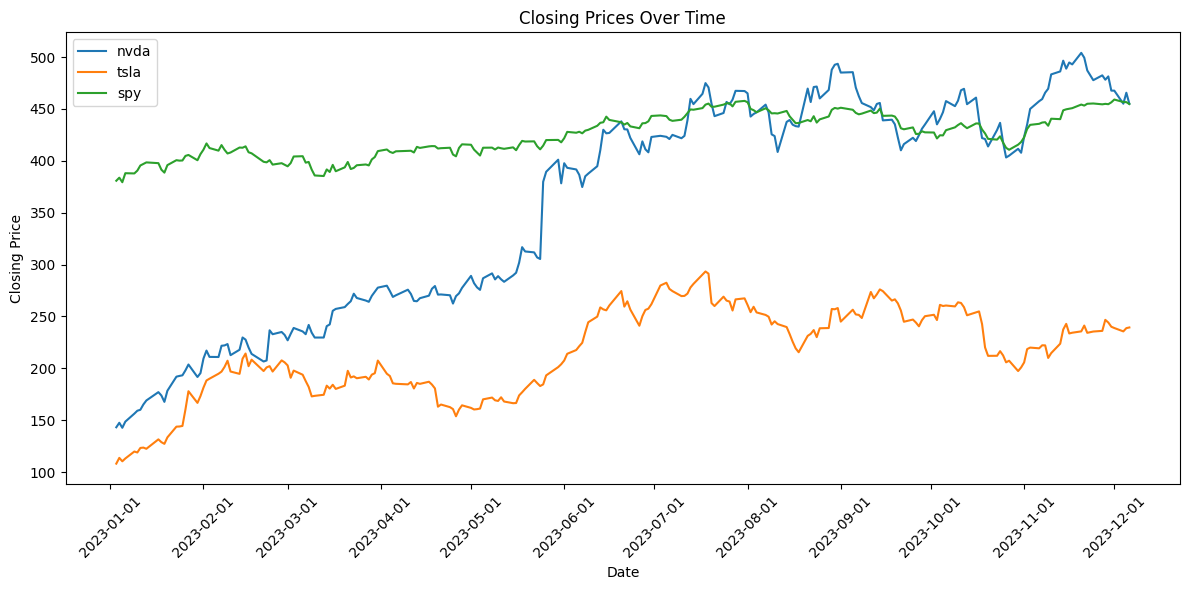

In [ ]:
from matplotlib.dates import DateFormatter, MonthLocator

# Visualization: Plot Closing Prices Over Time for Each Ticker
plt.figure(figsize=(12, 6))
for ticker, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
    plt.plot(df['Date'], df['Close'], label=ticker)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show ticks at intervals of 1 month
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Use a more compact date format
plt.legend()
plt.tight_layout()
plt.show()

To make sense of the data, it is better to normalise the data and compare them under the same scale:

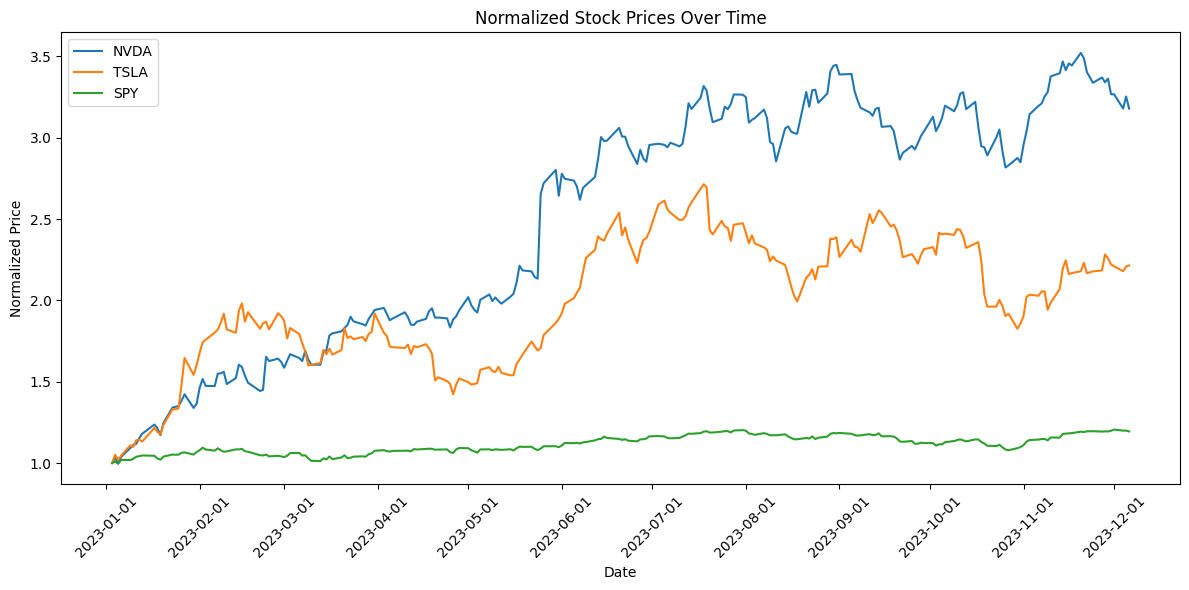

In [ ]:
# Normalize Stock Prices for Each Ticker
normalized_prices = {}
for ticker, df in dataframes.items():
    df['Normalized_Price'] = df['Close'] / df['Close'].iloc[0] # Normalise data, using closing price on first day of the time series
    normalized_prices[ticker] = df['Normalized_Price']

# Visualization: Plot Normalized Stock Prices Over Time for Each Ticker
plt.figure(figsize=(12, 6))
for ticker, normalized_price in normalized_prices.items():
    plt.plot(df['Date'], normalized_price, label=ticker)

plt.title('Normalized Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MonthLocator())  # Show ticks at intervals of 1 month
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Use a more compact date format
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
We can draw the conclusion that both NVDA & TSLA have outperformed the overall market year-to-date in 2023.